In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import cv2
import PIL
import tensorflow as tf
from tensorflow.keras import layers
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 1s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
list(data_dir.glob('*/*.jpg'))[:7] #glob will help us to collect all images in dir and subdir etc

[PosixPath('datasets/flower_photos/sunflowers/15054750690_198b6ab0f2_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4932736136_0115955987.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20342824594_9740b7b160.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5970868068_fe1c8b282e_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/184682920_97ae41ce60_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/287233531_74d4605814_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3568114325_d6b1363497.jpg')]

In [6]:
image_count= len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses= list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4065283966_9504b98269.jpg'),
 PosixPath('datasets/flower_photos/roses/1775233884_12ff5a124f.jpg'),
 PosixPath('datasets/flower_photos/roses/12450781274_eb78723921.jpg'),
 PosixPath('datasets/flower_photos/roses/5292988046_a10f4b0365_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4881402397_1c664af2f7_n.jpg')]

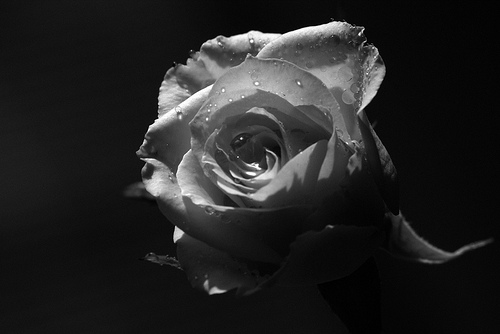

In [8]:
PIL.Image.open(str(roses[0]))

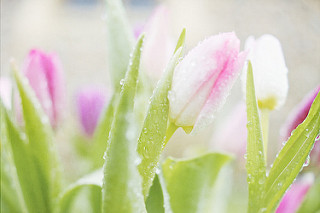

In [9]:
tulips= list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
#What we are doing here is resizing all the image into same dimension. 
#imread converts path lib into array and we will use resize to 100x100 
#we need to have number for y . It is here we will use the flower_labels_dict to get the name for particular flower
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [12]:
#Lets check x and y values
X[0]

array([[[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[16, 16, 16],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       ...,

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 8,  8,  8]],

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 7,  7,  7]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [ 9,  9,  9],
        [ 8,  8,  8],
        [ 7,  7,  7]]], dtype=uint8)

In [13]:
y[0]
#so we got list X which gives us info about the image that is 2 dimension and third is rgb channel 
#y is label of the image

0

In [14]:
#For simplification we will convert both of them into simple np array
X=np.array(X)
y=np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#normalize
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

#cnn
num_classes = 5

model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)      

model.evaluate(X_test_scaled,y_test)

As we can see it is giving 100% accuarcy in training set and 65% in test set which is too low means that the model is overfitting. So we will be doing data augumentation to tackle the overfitting.


In [16]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical", input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

2022-05-10 10:53:33.210453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 10:53:33.317668: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 10:53:33.318448: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 10:53:33.319596: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [17]:
num_classes = 5

model = tf.keras.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

2022-05-10 10:53:36.576064: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1069977600 exceeds 10% of free system memory.
2022-05-10 10:53:37.654400: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1069977600 exceeds 10% of free system memory.
2022-05-10 10:53:38.431195: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-05-10 10:53:40.138399: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


86/86 [==============================] - 9s 18ms/step - loss: 1.2921 - accuracy: 0.4393
Epoch 2/30
86/86 [==============================] - 1s 16ms/step - loss: 1.0390 - accuracy: 0.5821
Epoch 3/30
86/86 [==============================] - 1s 16ms/step - loss: 0.9448 - accuracy: 0.6323
Epoch 4/30
86/86 [==============================] - 2s 18ms/step - loss: 0.8852 - accuracy: 0.6566
Epoch 5/30
86/86 [==============================] - 1s 17ms/step - loss: 0.8377 - accuracy: 0.6715
Epoch 6/30
86/86 [==============================] - 1s 16ms/step - loss: 0.8083 - accuracy: 0.6871
Epoch 7/30
86/86 [==============================] - 1s 16ms/step - loss: 0.7875 - accuracy: 0.6944
Epoch 8/30
86/86 [==============================] - 1s 17ms/step - loss: 0.7770 - accuracy: 0.6991
Epoch 9/30
86/86 [==============================] - 1s 16ms/step - loss: 0.7314 - accuracy: 0.7257
Epoch 10/30
86/86 [==============================] - 1s 16ms/step - loss: 0.7180 - accuracy: 0.7278
Epoch 11/30
86/86 [=

In [18]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)       

In [19]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 13ms/step - loss: 0.7193 - accuracy: 0.7549


[0.71926349401474, 0.7549019455909729]

So data augumentation did help us to work on our accuracy. 